In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df_churn = pd.read_csv('C:\\Users\\fried\\Downloads\\bankchurners.csv')

In [3]:
df_churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
print(df_churn.shape)

(10127, 23)


In [5]:
print(df_churn.describe)

<bound method NDFrame.describe of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Inco

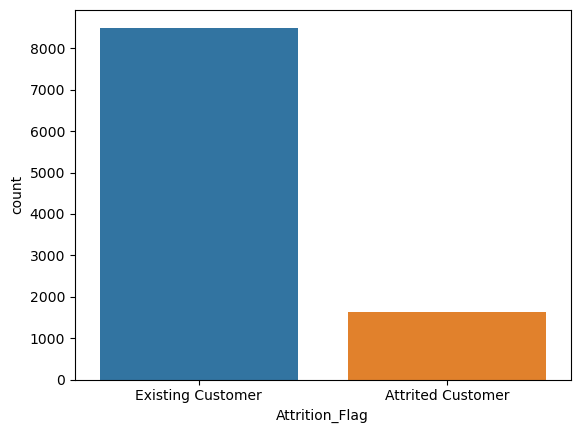

In [6]:
sns.countplot(x='Attrition_Flag', data=df_churn) 
plt.show() 

In [7]:
#drop last 2 columns which are not needed for the analysis
bankchurn = df_churn.drop(df_churn.columns[-2:],axis=1)
#drop customer number which is irrelavant for analysis
bankchurn = bankchurn.drop(bankchurn.columns[0:1],axis=1)
bankchurn.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [8]:
#check if age is a factor in churned customers versus existing customers
bankchurn.groupby('Attrition_Flag')['Customer_Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627.0,46.659496,7.665652,26.0,41.0,47.0,52.0,68.0
Existing Customer,8500.0,46.262118,8.081157,26.0,41.0,46.0,52.0,73.0


In [9]:
#check if dependent count is a factor in churned customers versus existing customers
bankchurn.groupby('Attrition_Flag')['Dependent_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627.0,2.402581,1.275010,0.0,2.0,2.0,3.0,5.0
Existing Customer,8500.0,2.335412,1.303229,0.0,1.0,2.0,3.0,5.0


In [10]:
#check if transaction amount is a factor in churned customers versus existing customers
bankchurn.groupby('Attrition_Flag')['Total_Trans_Amt'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627.0,3095.025814,2308.227629,510.0,1903.50,2329.0,2772.00,10583.0
Existing Customer,8500.0,4654.655882,3512.772635,816.0,2384.75,4100.0,4781.25,18484.0


In [11]:
#check if transaction count  is a factor in churned customers versus existing customers
bankchurn.groupby('Attrition_Flag')['Total_Trans_Ct'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627.0,44.933620,14.568429,10.0,37.0,43.0,51.0,94.0
Existing Customer,8500.0,68.672588,22.919011,11.0,54.0,71.0,82.0,139.0


In [12]:
#check if credit limit is a factor in churned customers versus existing customers
bankchurn.groupby('Attrition_Flag')['Credit_Limit'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627.0,8136.039459,9095.334105,1438.3,2114.0,4178.0,9933.50,34516.0
Existing Customer,8500.0,8726.877518,9084.969807,1438.3,2602.0,4643.5,11252.75,34516.0


In [13]:
#divide data into attrited and existing data frames for ease of plotting
attrited = bankchurn[bankchurn['Attrition_Flag'] == 'Attrited Customer']
existing = bankchurn[bankchurn['Attrition_Flag'] == 'Existing Customer']

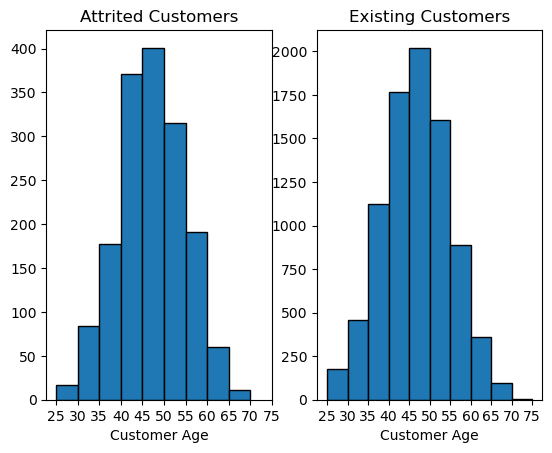

In [14]:
#plot age of customers both attrited and existing
plt.subplot(1,2,1)
plt.hist(attrited['Customer_Age'], bins = (25,30,35,40,45,50,55,60,65,70), edgecolor = 'black')
plt.title ('Attrited Customers')
plt.xlabel('Customer Age')
plt.xticks (ticks =  [25,30,35,40,45,50,55,60,65,70,75])
plt.subplot(1,2,2)
plt.hist(existing['Customer_Age'], bins = (25,30,35,40,45,50,55,60,65,70,75), edgecolor = 'black')
plt.title ('Existing Customers')
plt.xlabel('Customer Age')
plt.xticks (ticks =  [25,30,35,40,45,50,55,60,65,70,75])
plt.show()

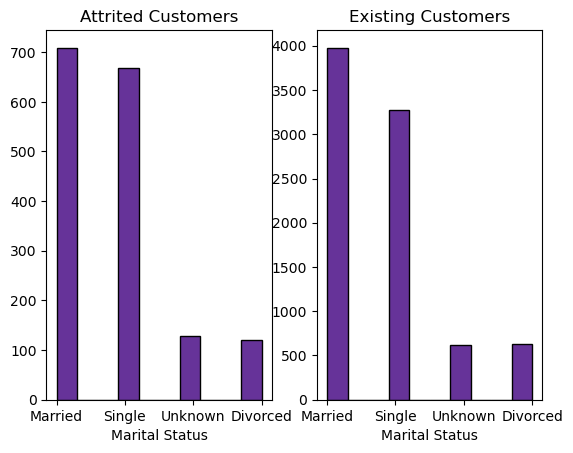

In [15]:
#plot difference in marital status between attrited and existing customers
plt.subplot(1,2,1)
plt.hist(attrited['Marital_Status'],color = 'rebeccapurple', edgecolor = 'black')
plt.title ('Attrited Customers')
plt.xlabel('Marital Status')
plt.subplot(1,2,2)
plt.hist(existing['Marital_Status'],color = 'rebeccapurple', edgecolor = 'black')
plt.title ('Existing Customers')
plt.xlabel('Marital Status')
plt.show()

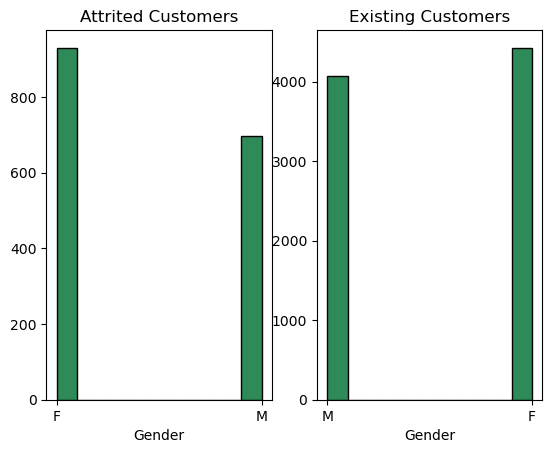

In [16]:
#plot difference in gender between attrited and existing customers
plt.subplot(1,2,1)
plt.hist(attrited['Gender'], color = 'seagreen', edgecolor = 'black')
plt.title ('Attrited Customers')
plt.xlabel('Gender')
plt.subplot(1,2,2)
plt.hist(existing['Gender'], color = 'seagreen', edgecolor = 'black')
plt.title ('Existing Customers')
plt.xlabel('Gender')
plt.show()

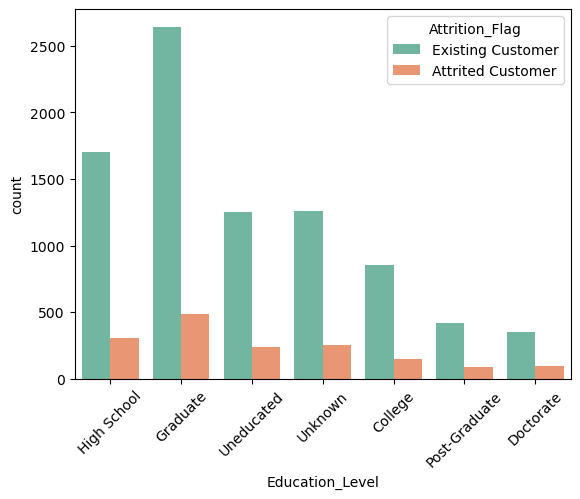

In [17]:
# Create countplot showing education levels of attrited and existing customers
sns.countplot(x = bankchurn['Education_Level'], data = bankchurn, hue = "Attrition_Flag", palette = "Set2")
plt.xticks(rotation=45)
#g.set_xticklabels(labels=bankchurn['Education_Level'], rotation=30)
plt.show()

In [18]:
#prepare the data for creating a model
# change binary fields, Attrition Flag, Gender,  to 0 or 1
bankchurn['Attrition_Flag'] = bankchurn['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer': 1})

bankchurn['Gender']=bankchurn['Gender'].replace({'M':0, 'F':1})
print(bankchurn.head())
bankchurn.info()

   Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0               0            45       0                3     High School   
1               0            49       1                5        Graduate   
2               0            51       0                3        Graduate   
3               0            40       1                4     High School   
4               0            40       0                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                 

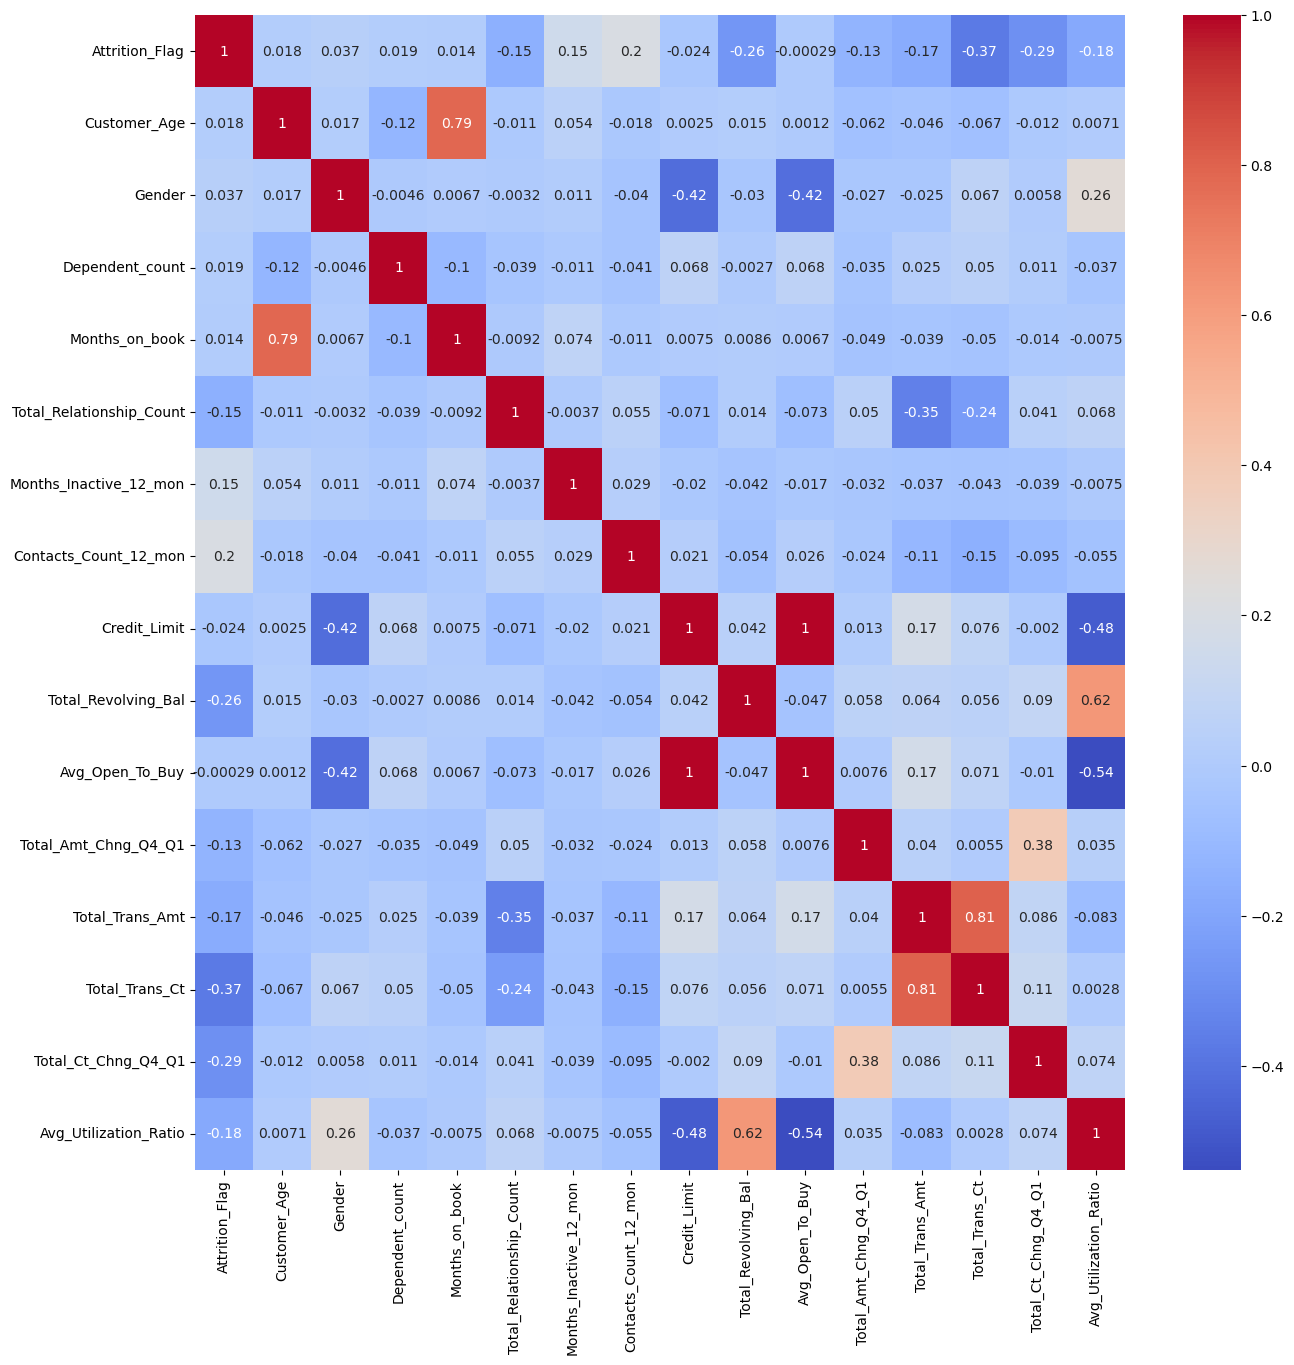

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(bankchurn.corr(), annot=True, cmap='coolwarm') 
plt.show()

In [20]:
#encode catagorical fields to numbers : Education_level, Marital_Status, income_catagory, card_category
# Multiple categorical columns
categorical_cols = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

ohe = pd.get_dummies(bankchurn, columns=categorical_cols)

In [21]:
ohe.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,0,49,1,5,44,6,1,2,8256.0,864,...,0,0,0,0,1,0,1,0,0,0
2,0,51,0,3,36,4,1,0,3418.0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,40,1,4,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0
4,0,40,0,3,21,5,1,0,4716.0,0,...,0,0,1,0,0,0,1,0,0,0


In [22]:
#split data into training and test data
from sklearn.model_selection import train_test_split
# Create feature variable
X = ohe.drop('Attrition_Flag', axis=1)
# Create target variable
y = ohe['Attrition_Flag']
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [23]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
# Instantiate the classifier
clf = LogisticRegression(max_iter = 900)
# Fit the classifier
clf.fit(X_train, y_train)
# Predict the label of new_customer
y_pred = clf.predict(X_test)
print ('score for logistic regression is: ', clf.score(X_test, y_test))
#calculate precision and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
lrprecision = precision_score(y_test, y_pred)
lrrecall = recall_score(y_test, y_pred)


score for logistic regression is:  0.8840078973346496


In [24]:
#test accuracy with ROC
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]
# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fprl, tprl, thresholdsl = roc_curve(y_test, y_pred_prob)

from sklearn.metrics import roc_auc_score

# calculate the auc_score
logist_reg_auc_score = roc_auc_score (y_test, y_pred_prob)

confusion matrix for logistic regression model


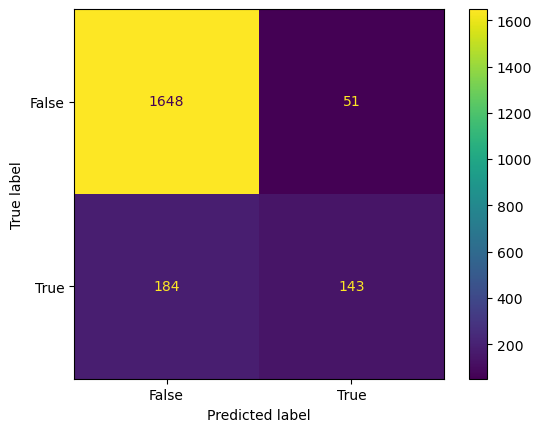

f1 score for logistic regression is:  0.5489443378119001


In [25]:
#test accuracy
# Import confusion_matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# Print the confusion matrix

print('confusion matrix for logistic regression model')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
# Import f1_score
from sklearn.metrics import f1_score
# Print the F1 score
print('f1 score for logistic regression is: ' , f1_score(y_test, y_pred))

In [26]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier 
# Instantiate the classifier
clf = DecisionTreeClassifier()
# Fit the classifier
clf.fit(X_train, y_train)
# Predict the label of new_customer
y_pred = clf.predict(X_test)
print ('score for Decision Tree Classifier is: ', clf.score(X_test, y_test))
#calculate precision and recall
dtprecision = precision_score(y_test, y_pred)
dtrecall = recall_score(y_test, y_pred)


score for Decision Tree Classifier is:  0.9294175715695953


In [27]:
#test accuracy with ROC
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics and save in unique variables to plot all 3 model scores in one plot
fprd, tprd, thresholdsd = roc_curve(y_test, y_pred_prob)

# calculate the AUC score
dec_tree_auc_score = roc_auc_score (y_test, y_pred_prob)

Confusion matrix for Decision Tree Classifier is 


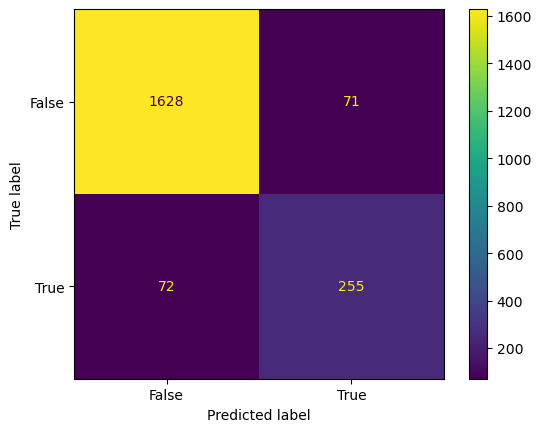

f1 score for decision tree  classifier is:  0.7810107197549769


In [28]:
#test accuracy with confusion_matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# Print the confusion matrix
print('Confusion matrix for Decision Tree Classifier is ')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
# Print the F1 score

print('f1 score for decision tree  classifier is: ' , f1_score(y_test, y_pred))

In [29]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Compute accuracy
print ('score for Random Forest Classifier is: ', clf.score(X_test, y_test))
#calculate precision and recall
rfprecision = precision_score(y_test, y_pred)
rfrecall = recall_score(y_test, y_pred)

score for Random Forest Classifier is:  0.9545903257650543


Confusion matrix for Random Forest Classifier is 


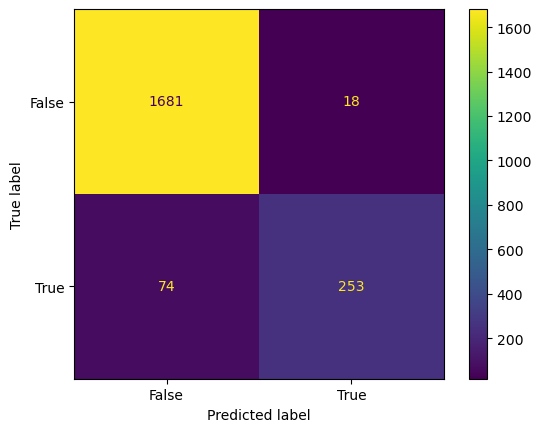

f1 score for random forest classifier is:  0.8461538461538461


In [30]:
#test accuracy
#cm = confusion_matrix(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# Print the confusion matrix
print('Confusion matrix for Random Forest Classifier is ')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
# Print the F1 score
print('f1 score for random forest classifier is: ' , f1_score(y_test, y_pred))


In [31]:
#test accuracy with ROC
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics and save in unique variables to plot all 3 model scores in one plot
fprr, tprr, thresholdsr = roc_curve(y_test, y_pred_prob)

# calculate the  score
rand_for_auc_score = roc_auc_score (y_test, y_pred_prob

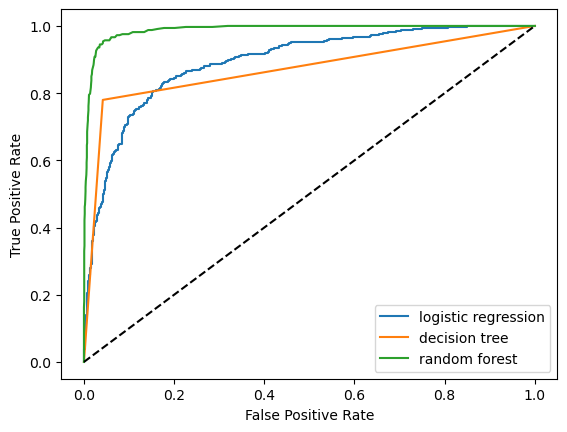

logistic regression auc score  0.8932741511916527
decision tree auc score  0.8690136129725525
random forest auc score  0.9886828553583417


In [32]:
#test accuracy with ROC
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]
# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fprr, tprr, thresholdsr = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve

plt.plot(fprl, tprl, label = 'logistic regression')
plt.plot(fprd,tprd, label = 'decision tree')
plt.plot(fprr, tprr, label = 'random forest')
plt.legend()
# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


# Print the AUC score stored in unique variables
import colorama
from colorama import Fore,Back
#Initialize colorama
colorama.init(autoreset=True)

print (Back.BLUE + Fore.BLACK +'logistic regression auc score ',  logist_reg_auc_score)                       
print (Back.YELLOW + Fore.BLACK + 'decision tree auc score ',dec_tree_auc_score )  
print(Back.GREEN + Fore.BLACK + 'random forest auc score ', rand_for_auc_score)

In [33]:
#print precison and recall scores
print('precison score for logistic regression: ', lrprecision)
print('precison score for decison tree: ', dtprecision)
print('precison score for random forest: ', rfprecision)
print()
print('recall score for logistic regression: ', lrrecall)
print('recall score for decision tree: ', dtrecall)
print('recall score for random forest: ', rfrecall)

precison score for logistic regression:  0.7371134020618557
precison score for decison tree:  0.7822085889570553
precison score for random forest:  0.933579335793358

recall score for logistic regression:  0.43730886850152906
recall score for decision tree:  0.7798165137614679
recall score for random forest:  0.7737003058103975
